
# Chapter 3

# Lab: Linear Regression

## Importing packages
We import our standard libraries at this top
level.

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### New imports
Throughout this lab we will introduce new functions and libraries. However,
we will import them here to emphasize these are the new
code objects in this lab. Keeping imports near the top
of a notebook makes the code more readable, since scanning the first few
lines tells us what libraries are used.

In [83]:
import statsmodels.api as sm


 We will provide relevant details about the
functions below as they are needed.

Besides importing whole modules, it is also possible
to import only a few items from a given module. This
will help keep the  *namespace* clean.
We will use a few specific objects from the `statsmodels` package
which we import here.

In [84]:
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm


As one of the import statements above is quite a long line, we inserted a line break `\` to
ease readability.

We will also use some functions written for the labs in this book in the `ISLP`
package.

In [85]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)


### Inspecting Objects and Namespaces
The
function  `dir()`
provides a list of
objects in a namespace.

In [86]:
dir()


['A',
 'Auto',
 'Auto_copy',
 'Boston',
 'Carseats',
 'In',
 'MS',
 'Out',
 'ProbPlot',
 'QQ',
 'VIF',
 'X',
 'Xma',
 '_',
 '_10',
 '_12',
 '_13',
 '_14',
 '_15',
 '_16',
 '_17',
 '_18',
 '_19',
 '_20',
 '_25',
 '_26',
 '_27',
 '_28',
 '_29',
 '_30',
 '_31',
 '_32',
 '_33',
 '_34',
 '_35',
 '_36',
 '_37',
 '_39',
 '_40',
 '_41',
 '_42',
 '_43',
 '_45',
 '_46',
 '_47',
 '_48',
 '_49',
 '_5',
 '_50',
 '_54',
 '_56',
 '_58',
 '_59',
 '_6',
 '_60',
 '_64',
 '_67',
 '_68',
 '_69',
 '_7',
 '_70',
 '_76',
 '_77',
 '_78',
 '_79',
 '_8',
 '_80',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__vsc_ipynb_file__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i35',
 '_i36',
 '_i37',
 '_i38',
 '_i39',
 '_i4',


 This shows you everything that `Python` can find at the top level.
There are certain objects like `__builtins__` that contain references to built-in
functions like `print()`.

Every python object has its own notion of
namespace, also accessible with `dir()`. This will include
both the attributes of the object
as well as any methods associated with it. For instance, we see `'sum'` in the listing for an
array.

In [87]:
A = np.array([3,5,11])
dir(A)


['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__o

 This indicates that the object `A.sum` exists. In this case it is a method
that can be used to compute the sum of the array `A` as can be seen by typing `A.sum?`.

In [88]:
A.sum()


19

## Simple Linear Regression
In this section we will  construct model 
matrices (also called design matrices) using the `ModelSpec()`  transform from `ISLP.models`.

We  will use the `Boston` housing data set, which is contained in the `ISLP` package.  The `Boston` dataset records  `medv`  (median house value) for $506$ neighborhoods
around Boston.  We will build a regression model to predict  `medv`  using $13$
predictors such as  `rmvar`  (average number of rooms per house),
 `age`  (proportion of owner-occupied units built prior to 1940), and  `lstat`  (percent of
households with low socioeconomic status).  We will use `statsmodels` for this
task, a `Python` package that implements several commonly used
regression methods.

We have included a simple loading function `load_data()` in the
`ISLP` package:

In [89]:
Boston = load_data("Boston")
Boston.columns


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

Type `Boston?` to find out more about these data.

We start by using the `sm.OLS()`  function to fit a
simple linear regression model.  Our response will be
 `medv`  and  `lstat`  will be the single predictor.
For this model, we can create the model matrix by hand.


In [90]:
Boston?

Type:        DataFrame
String form:
crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
           0    0.00632  18.0   2.3 <...> 0   5.64  23.9
           504     21.0   6.48  22.0
           505     21.0   7.88  11.9
           
           [506 rows x 13 columns]
Length:      506
File:        ~/anaconda3/lib/python3.11/site-packages/pandas/core/frame.py
Docstring:  
Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, dataclass or list-like objects. If
    data is a dict, column order follows insertion-order. If a dict contains Series
    which have an index defined, it is aligned by its index.



In [91]:
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]),
                  'lstat': Boston['lstat']})
X[:4]


,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


We extract the response, and fit the model.

In [92]:
y = Boston['medv']
model = sm.OLS(y, X)
results = model.fit()


Note that `sm.OLS()` does
not fit the model; it specifies the model, and then `model.fit()` does the actual fitting.  

Our `ISLP` function `summarize()` produces a simple table of the parameter estimates,
their standard errors, t-statistics and p-values.
The function takes a single argument, such as the object `results` 
returned here by the `fit`
method, and returns such a summary.

In [93]:
summarize(results)


,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


Before we describe other methods for working with fitted models, we outline a more useful and general framework for constructing a model matrix~`X`.
### Using Transformations: Fit and Transform
Our model above has a single predictor, and constructing `X` was straightforward. 
In practice  we often fit models with more than one predictor, typically selected from an array or data frame.
We may wish to introduce transformations to the variables before fitting the model, specify interactions between variables, and expand some particular variables into sets of variables (e.g. polynomials).
The `sklearn`  package has a particular notion
for this type of task: a *transform*. A transform is an object
that is created with some parameters as arguments. The
object has two main methods: `fit()` and `transform()`.

We provide a general approach for specifying models and constructing
the model matrix through the transform `ModelSpec()` in the `ISLP` library.
`ModelSpec()`
(renamed `MS()` in the preamble) creates a
transform object, and then a pair of methods
`transform()` and `fit()` are used to construct a
corresponding model matrix.

We first describe this process for our simple regression model  using a single predictor `lstat` in
the `Boston` data frame, but will use it repeatedly in more
complex tasks in this and other labs in this book.
In our case the transform is created by the expression
`design = MS(['lstat'])`.

The `fit()`  method takes the original array and may do some
initial computations on it, as specified in the transform object.
For example, it may compute means and standard deviations for centering and scaling.
The `transform()` 
method applies the fitted transformation to the array of data, and produces the model matrix.


In [94]:
design = MS(['lstat'])
design = design.fit(Boston)
X = design.transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In this simple case, the `fit()`  method does very little; it simply checks that the variable `'lstat'` specified in `design` exists in `Boston`. Then `transform()` constructs the model matrix with two columns: an `intercept` and the variable `lstat`.

These two operations can be  combined with the
`fit_transform()`  method.

In [95]:
design = MS(['lstat'])
X = design.fit_transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


Note that, as in the previous code chunk when the two steps were done separately, the `design` object is changed as a result of the `fit()` operation. The power of this pipeline will become clearer when we fit more complex models that involve interactions and transformations.

Let's return to our fitted regression model.
The object
`results` has several methods that can be used for inference.
We already presented a function `summarize()` for showing the essentials of the fit.
For a full and somewhat exhaustive summary of the fit, we can use the `summary()` 
method.

In [96]:
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           5.08e-88
Time:                        16:07:41   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The fitted coefficients can also be retrieved as the
`params` attribute of `results`.

In [97]:
results.params


intercept    34.553841
lstat        -0.950049
dtype: float64

The `get_prediction()`  method can be used to obtain predictions, and produce confidence intervals and
prediction intervals for the prediction of  `medv`  for  given values of  `lstat`.

We first create a new data frame, in this case containing only the variable `lstat`, with the values for this variable at which we wish to make predictions.
We then use the `transform()` method of `design` to create the corresponding model matrix.

In [98]:
new_df = pd.DataFrame({'lstat':[5, 10, 15]})
newX = design.transform(new_df)
newX


,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15



Next we compute the predictions at `newX`, and view them by extracting the `predicted_mean` attribute.

In [99]:
new_predictions = results.get_prediction(newX);
new_predictions.predicted_mean


array([29.80359411, 25.05334734, 20.30310057])

We can produce 95% confidence intervals for the predicted values.

In [100]:
new_predictions.conf_int(alpha=0.05)


array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

Prediction intervals are computing by setting `obs=True`:

In [101]:
new_predictions.conf_int(obs=True, alpha=0.05)


array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

 For instance, the 95% confidence interval associated with an
 `lstat`  value of 10 is (24.47, 25.63), and the 95% prediction
interval is (12.82, 37.28).  As expected, the confidence and
prediction intervals are centered around the same point (a predicted
value of 25.05 for  `medv`  when  `lstat`  equals
10), but the latter are substantially wider.

Next we will plot  `medv`  and  `lstat` 
using `DataFrame.plot.scatter()`,
and wish to
add the regression line to the resulting plot.

### Defining Functions
While there is a function
within the `ISLP` package that adds a line to an existing plot, we take this opportunity
to define our first function to do so.

In [102]:
def abline(ax, b, m):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim)


 A few things are illustrated above. First we see the syntax for defining a function:
`def funcname(...)`. The function has arguments `ax, b, m`
where `ax` is an axis object for an exisiting plot, `b` is the intercept and
`m` is the slope of the desired line. Other plotting  options can be passed on to
`ax.plot` by including additional optional arguments as follows:

In [103]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)



The addition of `*args` allows any number of
non-named arguments to `abline`, while `*kwargs` allows any
number of named arguments (such as `linewidth=3`) to `abline`.
In our function, we pass
these arguments verbatim to `ax.plot` above. Readers
interested in learning more about
functions are referred to the section on
defining functions in [docs.python.org/tutorial](https://docs.python.org/3/tutorial/controlflow.html#defining-functions).

Let’s use our new function to add this regression line to a plot of
`medv` vs. `lstat`.

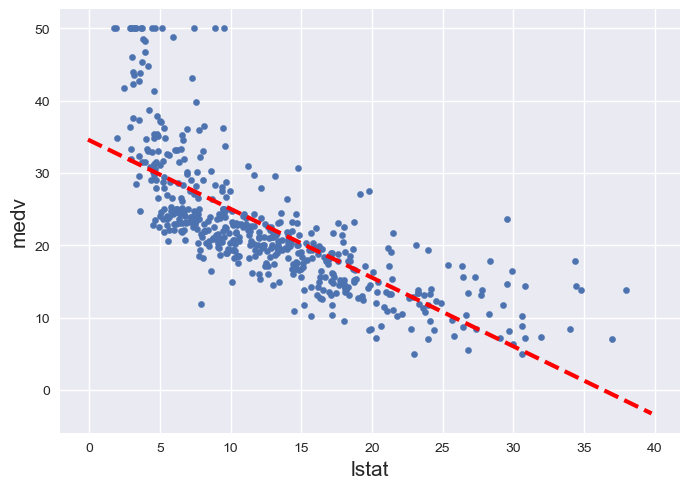

In [104]:
ax = Boston.plot.scatter('lstat', 'medv')
abline(ax,
       results.params[0],
       results.params[1],
       'r--',
       linewidth=3)


Thus, the final call to `ax.plot()` is `ax.plot(xlim, ylim, 'r--', linewidth=3)`.
We have used the argument `'r--'` to produce a red dashed line, and added
an argument to make it of width 3.
There is some evidence for non-linearity in the relationship between  `lstat`  and  `medv`. We will explore this issue later in this lab.

As mentioned above, there is an existing function to add a line to a plot --- `ax.axline()` --- but knowing how to write such functions empowers us to create more expressive displays.



Next we examine some diagnostic plots, several of which were discussed
in Section 3.3.3.
We can find the fitted values and residuals
of the fit as attributes of the `results` object.
Various influence measures describing the regression model
are computed with the `get_influence()` method.
As we will not use the `fig` component returned
as the first value from `subplots()`, we simply
capture the second returned value in `ax` below.

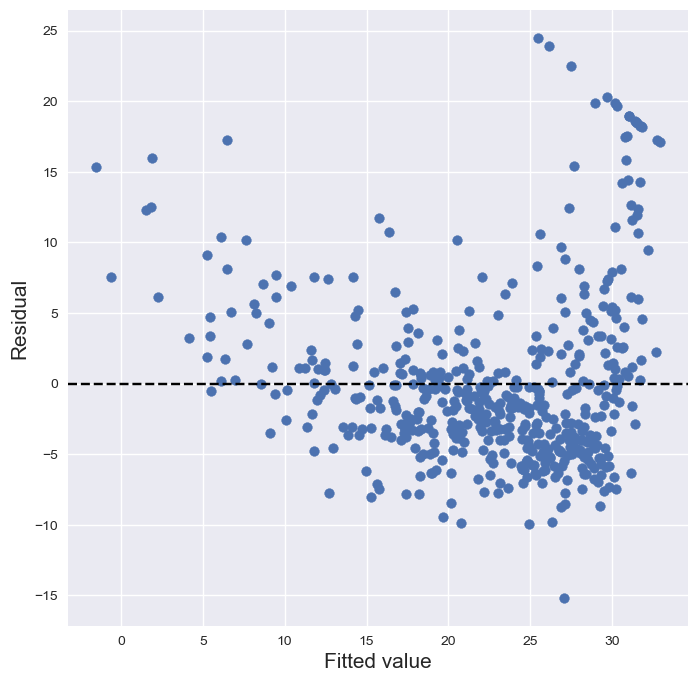

In [105]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');


 We add a horizontal line at 0 for reference using the
 `ax.axhline()`   method, indicating
it should be black (`c='k'`) and have a dashed linestyle (`ls='--'`).

On the basis of the residual plot, there is some evidence of non-linearity.
Leverage statistics can be computed for any number of predictors using the
`hat_matrix_diag` attribute of the value returned by the
`get_influence()`  method.

374

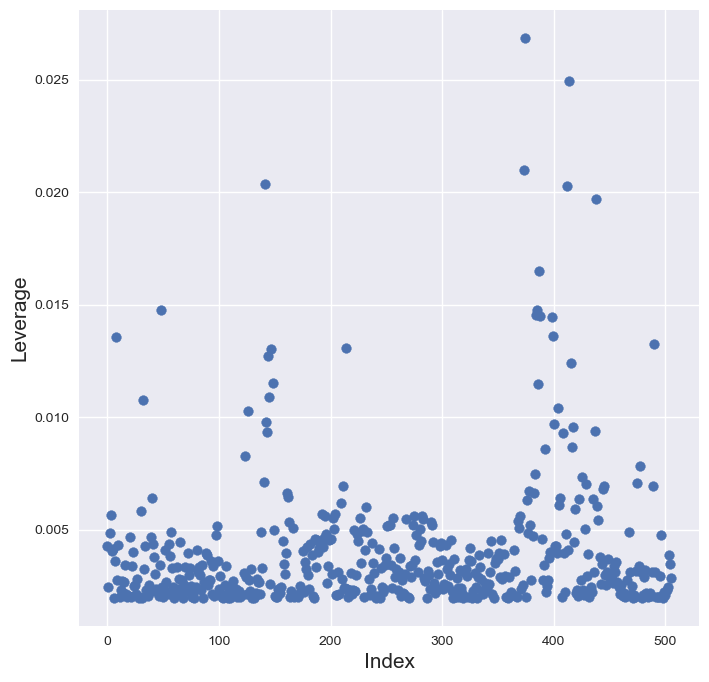

In [106]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)


 The `np.argmax()`  function identifies the index of the largest element of an array, optionally computed over an axis of the array.
In this case, we maximized over the entire array
to determine which observation has the largest leverage statistic.

## Multiple Linear Regression
In order to fit a multiple linear regression model using least squares, we again use
the `ModelSpec()`  transform to construct the required
model matrix and response. The arguments
to `ModelSpec()` can be quite general, but in this case
a list of column names suffice. We consider a fit here with
the two variables `lstat` and `age`.

In [107]:
X = MS(['lstat', 'age']).fit_transform(Boston)
y = Boston['medv']
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


Notice how we have compacted the first line into a succinct expression describing the construction of `X`.

The  `Boston`   data set contains 12 variables, and so it would be cumbersome
to have to type all of these in order to perform a regression using all of the predictors.
Instead, we can use the following short-hand:\definelongblankMR{columns.drop()}{columns.slashslashdrop()}

In [108]:
terms = Boston.columns.drop('medv')
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

We can now fit the model with all the variables in `terms` using
the same model matrix builder.

In [109]:
X = MS(terms).fit_transform(Boston)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


What if we would like to perform a regression using all of the variables but one?  For
example, in the above regression output,   `age`  has a high $p$-value.
So we may wish to run a regression excluding this predictor.
The following syntax results in a regression using all predictors except  `age`.

In [110]:
minus_age = Boston.columns.drop(['medv', 'age']) 
Xma = MS(minus_age).fit_transform(Boston)
model1 = sm.OLS(y, Xma)
summarize(model1.fit())


,coef,std err,t,P>|t|
intercept,41.5251,4.920,8.441,0.000
crim,-0.1214,0.033,-3.683,0.000
zn,0.0465,0.014,3.379,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8528,0.868,3.287,0.001
nox,-18.4851,3.714,-4.978,0.000
rm,3.6811,0.411,8.951,0.000
dis,-1.5068,0.193,-7.825,0.000
rad,0.2879,0.067,4.322,0.000
tax,-0.0127,0.004,-3.333,0.001


## Multivariate Goodness of Fit
We can access the individual components of `results` by name
(`dir(results)` shows us what is available). Hence
`results.rsquared` gives us the $R^2$,
and
`np.sqrt(results.scale)` gives us the RSE.

Variance inflation factors (section 3.3.3) are sometimes useful
to assess the effect of collinearity in the model matrix of a regression model.
We will compute the VIFs in our multiple regression fit, and use the opportunity to introduce the idea of *list comprehension*.



In [111]:
dir(results)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_is_nested',
 '_transform_predict_exog',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 '

In [112]:
results.rsquared

0.7343070437613075

In [113]:
np.sqrt(results.scale)

4.798034335596368

### List Comprehension
Often we encounter a sequence of objects which we would like to transform
for some other task. Below, we compute the VIF for each
feature in our `X` matrix and produce a data frame
whose index agrees with the columns of `X`.
The notion of list comprehension can often make such
a task easier.

List comprehensions are simple and powerful ways to form
lists of `Python` objects. The language also supports
dictionary and *generator* comprehension, though these are
beyond our scope here. Let's look at an example. We compute the VIF for each of the variables
in the model matrix `X`, using the function `variance_inflation_factor()`.

In [114]:
vals = [VIF(X, i) for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=X.columns[1:])
vif


,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


The function `VIF()` takes two arguments: a dataframe or array,
and a variable column index. In the code above we call `VIF()` on the fly for all columns in `X`.  
We have excluded column 0 above (the intercept), which is not of interest. In this case the VIFs are not that exciting.

The object `vals` above could have been constructed with the following for loop:

In [115]:
vals = []
for i in range(1, X.values.shape[1]):
    vals.append(VIF(X.values, i))

vals

[1.7674859154310125,
 2.298458907735809,
 3.987180630757096,
 1.0711677737584044,
 4.369092622844793,
 1.9125324374368868,
 3.0882320397311984,
 3.954036641628298,
 7.445300760069838,
 9.002157663471797,
 1.797059593129779,
 2.8707765008417514]

List comprehension allows us to perform such repetitive operations in a more straightforward way.
## Interaction Terms
It is easy to include interaction terms in a linear model using `ModelSpec()`.
Including a tuple `("lstat","age")` tells the model
matrix builder to include an interaction term between
 `lstat`  and  `age`.

In [116]:
X = MS(['lstat',
        'age',
        ('lstat', 'age')]).fit_transform(Boston)
model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


## Non-linear Transformations of the Predictors
The model matrix builder can include terms beyond
just column names and interactions. For instance,
the `poly()` function supplied in `ISLP` specifies that
columns representing polynomial functions
of its first argument are added to the model matrix.

In [117]:
X = MS([poly('lstat', degree=2), 'age']).fit_transform(Boston)
model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


The effectively zero *p*-value associated with the quadratic term
(i.e. the third row above) suggests that it leads to an improved model.

By default, `poly()` creates a basis matrix for inclusion in the
model matrix whose
columns are *orthogonal polynomials*, which are designed for stable
least squares computations. {Actually, `poly()` is a  wrapper for the workhorse and standalone  function `Poly()` that does the  work in building the model matrix.}
Alternatively, had we included an argument
`raw=True` in the above call to `poly()`, the basis matrix would consist simply of
`lstat` and `lstat**2`. Since either of these bases
represent quadratic polynomials, the fitted values  would not
change in this case, just the polynomial coefficients.  Also by default, the columns
created by `poly()` do not include an intercept column as
that is automatically added by `MS()`.

We use the `anova_lm()` function to further quantify the extent to which the quadratic fit is
superior to the linear fit.

In [118]:
anova_lm(results1, results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


Here `results1` represents the linear submodel containing
predictors `lstat` and `age`,
while `results3` corresponds to the larger model above  with a quadratic
term in `lstat`.
The `anova_lm()` function performs a hypothesis test
comparing the two models. The null hypothesis is that the quadratic
term in the bigger model is not needed, and the alternative hypothesis is that the
bigger model is superior. Here the *F*-statistic is 177.28 and
the associated *p*-value is zero.
In this case the *F*-statistic is the square of the
*t*-statistic for the quadratic term in the linear model summary
for `results3` --- a consequence of the fact that these nested
models differ by one degree of freedom.
This provides very clear evidence that the quadratic polynomial in
`lstat` improves the linear model.
This is not surprising, since earlier we saw evidence for non-linearity in the relationship between `medv`
and  `lstat`.

The function `anova_lm()` can take more than two nested models
as input, in which case it compares every successive pair of models.
That also explains why their are `NaN`s in the first row above, since
there is no previous model with which to compare the first.


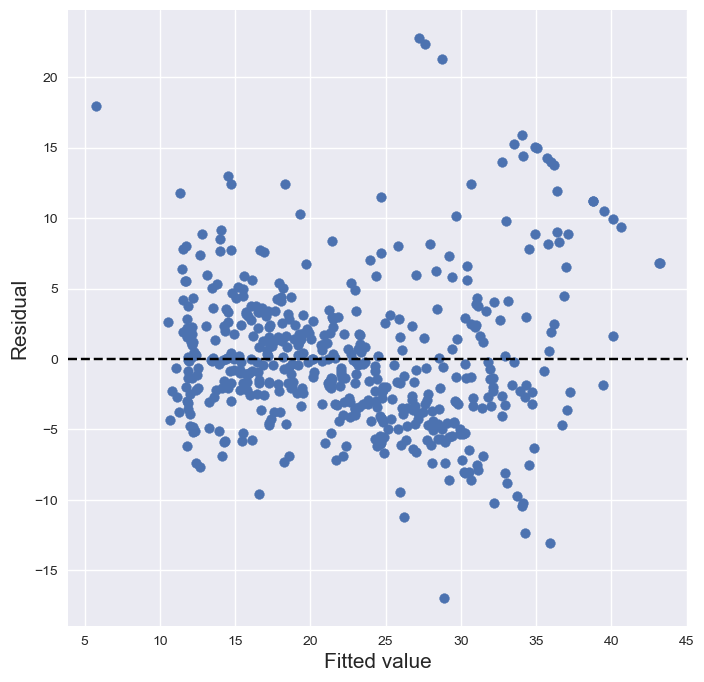

In [119]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results3.fittedvalues, results3.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');


We see that when the quadratic term is included in the model,
there is little discernible pattern in the residuals.
In order to create a cubic or higher-degree polynomial fit, we can simply change the degree argument
to `poly()`.


## Qualitative Predictors
Here we use the  `Carseats`  data, which is included in the
`ISLP` package. We will  attempt to predict `Sales`
(child car seat sales) in 400 locations based on a number of
predictors.

In [120]:
Carseats = load_data('Carseats')
Carseats.columns


Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [121]:
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [122]:
Carseats.dtypes

Sales           float64
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc      category
Age               int64
Education         int64
Urban          category
US             category
dtype: object

The `Carseats`   data includes qualitative predictors such as
 `ShelveLoc`, an indicator of the quality of the shelving
 location --- that is,
the  space within a store in which the car seat is displayed. The predictor
 `ShelveLoc`  takes on three possible values, `Bad`, `Medium`, and `Good`.
Given a qualitative variable such as  `ShelveLoc`, `ModelSpec()` generates dummy
variables automatically.
These variables are often referred to as a *one-hot encoding* of the categorical
feature. Their columns sum to one, so to avoid collinearity with an intercept, the first column is dropped. Below we see
the column `ShelveLoc[Bad]` has been dropped, since `Bad` is the first level of `ShelveLoc`.
Below we fit a multiple regression model that includes some interaction terms.

In [123]:
allvars = list(Carseats.columns.drop('Sales'))
y = Carseats['Sales']
final = allvars + [('Income', 'Advertising'), ('Price', 'Age')]
X = MS(final).fit_transform(Carseats)
model = sm.OLS(y, X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288


In the first line above, we made `allvars` a list, so that we
could add the interaction terms two lines down. 
Our model-matrix builder has created a `ShelveLoc[Good]`
dummy variable that takes on a value of 1 if the
shelving location is good, and 0 otherwise. It has also created a `ShelveLoc[Medium]`
dummy variable that equals 1 if the shelving location is medium, and 0 otherwise.
A bad shelving location corresponds to a zero for each of the two dummy variables.
The fact that the coefficient for `ShelveLoc[Good]` in the regression output is
positive indicates that a good shelving location is associated with high sales (relative to a bad location).
And `ShelveLoc[Medium]` has a smaller positive coefficient,
indicating that a medium shelving location leads to higher sales than a bad
shelving location, but lower sales than a good shelving location.



# **Applied**

### #8. This question involves the use of simple linear regression on the Auto data set.

(a) Use the sm.OLS() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summarize() function to print the results. Comment on the output. 

In [124]:
Auto = pd.read_csv('~/Desktop/Learning/ISL-P/ISLP_DataFiles/Auto.data',
                   na_values=['?'],
                   delim_whitespace=True)

Auto.dropna(inplace=True)

display(Auto.shape)

Auto.head()

(392, 9)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


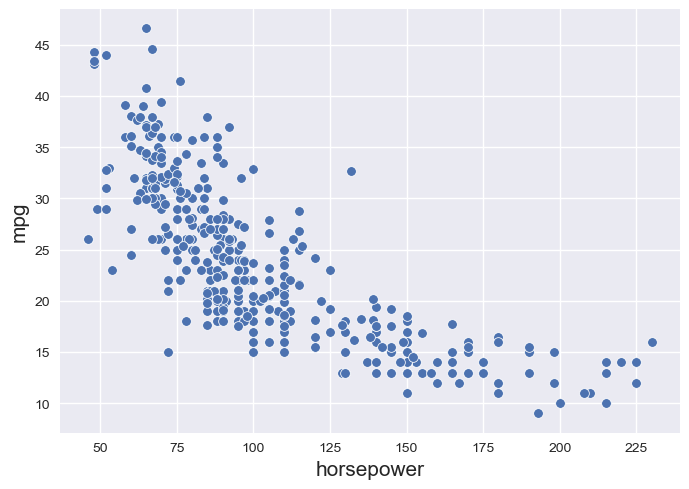

In [125]:
sns.scatterplot(x='horsepower', y='mpg', data=Auto)
ax.set_xlabel('horsepower')
ax.set_ylabel('mpg');

In [126]:
setup_X = MS(['horsepower'])
X = setup_X.fit_transform(Auto)

y = Auto['mpg']

model_hp_mpg = sm.OLS(y, X)

results_hp_mpg = model_hp_mpg.fit()

summarize(results_hp_mpg)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


- i. Is there a relationship between the predictor and the response?
- -Yes, there is a relationship between horsepower and mpg based on the low p-value of the horsepower coefficient. With the coefficient being negative, this indicates that as horsepower increases, mpg decreases on average, holding all other variables constant. 
- ii. How strong is the relationship between the predictor and the response?
- -The relationship is between the two is strong, given the low p-value.
- iii. Is the relationship between the predictor and the response positive or negative?
- -The relationship is negative.

In [127]:
results_hp_mpg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           7.03e-81
Time:                        16:07:41   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
results_hp_mpg.params

intercept     39.935861
horsepower    -0.157845
dtype: float64

- iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?
- -See below.

In [129]:
mpg_pred_df = pd.DataFrame({'horsepower':[98]})
my_newX = setup_X.transform(mpg_pred_df)
new_predictions = results_hp_mpg.get_prediction(my_newX)

# Predict mpg with 98 horsepower
new_predictions.predicted_mean

array([24.46707715])

In [130]:
# Confidence interval
new_predictions.conf_int(alpha=0.05)

array([[23.97307896, 24.96107534]])

In [131]:
# Prediction interval
new_predictions.conf_int(obs=True, alpha=0.05)

array([[14.80939607, 34.12475823]])

(b) Plot the response and the predictor in a new set of axes ax. Use the ax.axline() method or the abline() function defined in the lab to display the least squares regression line.

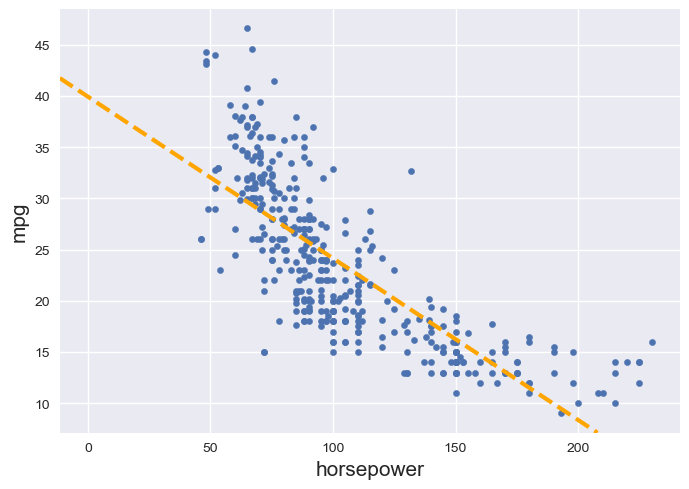

In [132]:
ax = Auto.plot.scatter('horsepower', 'mpg')
# abline(ax,
#        results.params[0],
#        results.params[1],
#        'r--',
#        linewidth=3)
ax.axline(xy1 =(0, results_hp_mpg.params[0]),
          slope=results_hp_mpg.params[1],
          color='orange',
          linestyle='--',
          linewidth=3);

(c) Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.

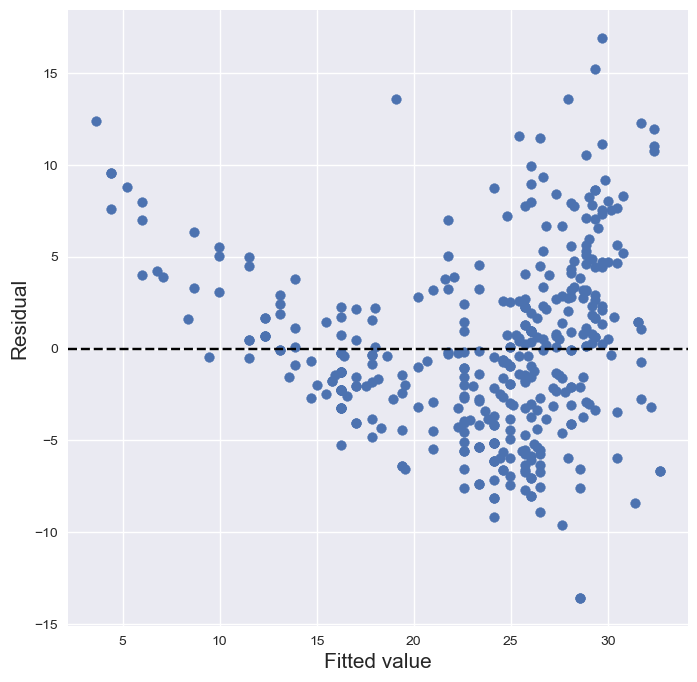

In [133]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results_hp_mpg.fittedvalues, results_hp_mpg.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

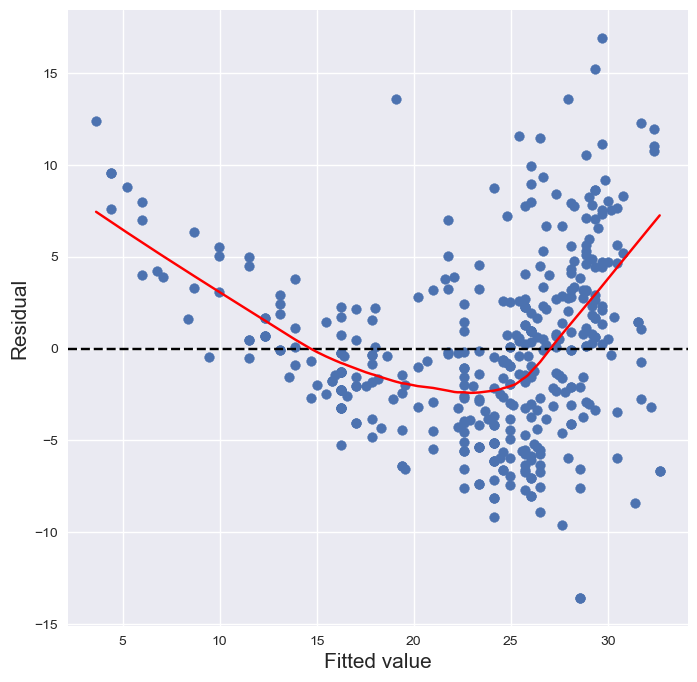

In [134]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# Create your the residual plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(results_hp_mpg.fittedvalues, results_hp_mpg.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

# Calculate the lowess smoothed trendline
lowess_results = lowess(results_hp_mpg.resid, results_hp_mpg.fittedvalues)

# Plot the lowess trendline
ax.plot(lowess_results[:, 0], lowess_results[:, 1], 'r-')

# Show the plot
plt.show()

Based on this graph, it appears there is an issue with the relationship between `horsepower` and `mpg` being nonlinear. It also looks like there is an issue with the variance of the errors not being constant. 

115

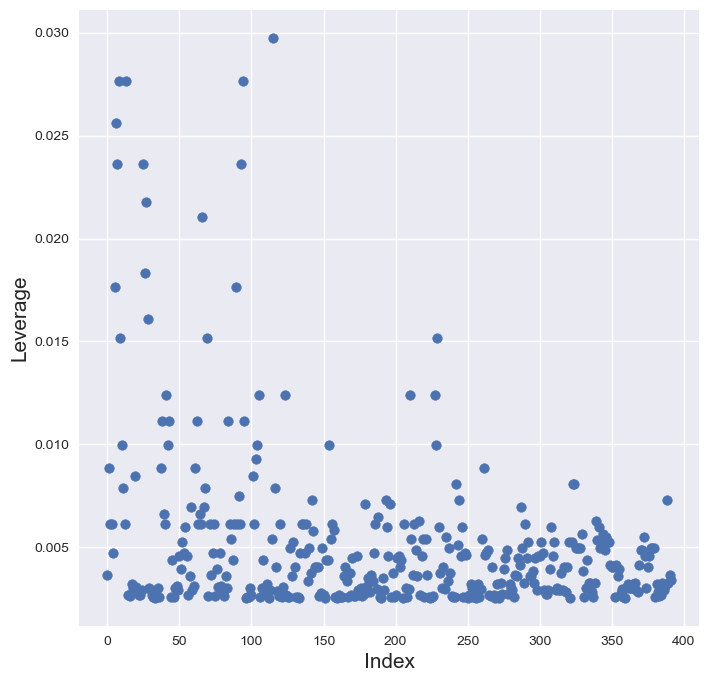

In [135]:
infl = results_hp_mpg.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

It appears there are some high leverage points in the data based on the above graph which are most likely having a large impact on the fit of the regression.

### #9. This question involves the use of multiple linear regression on the Auto data set.

- (a) Produce a scatterplot matrix which includes all of the variables in the data set.

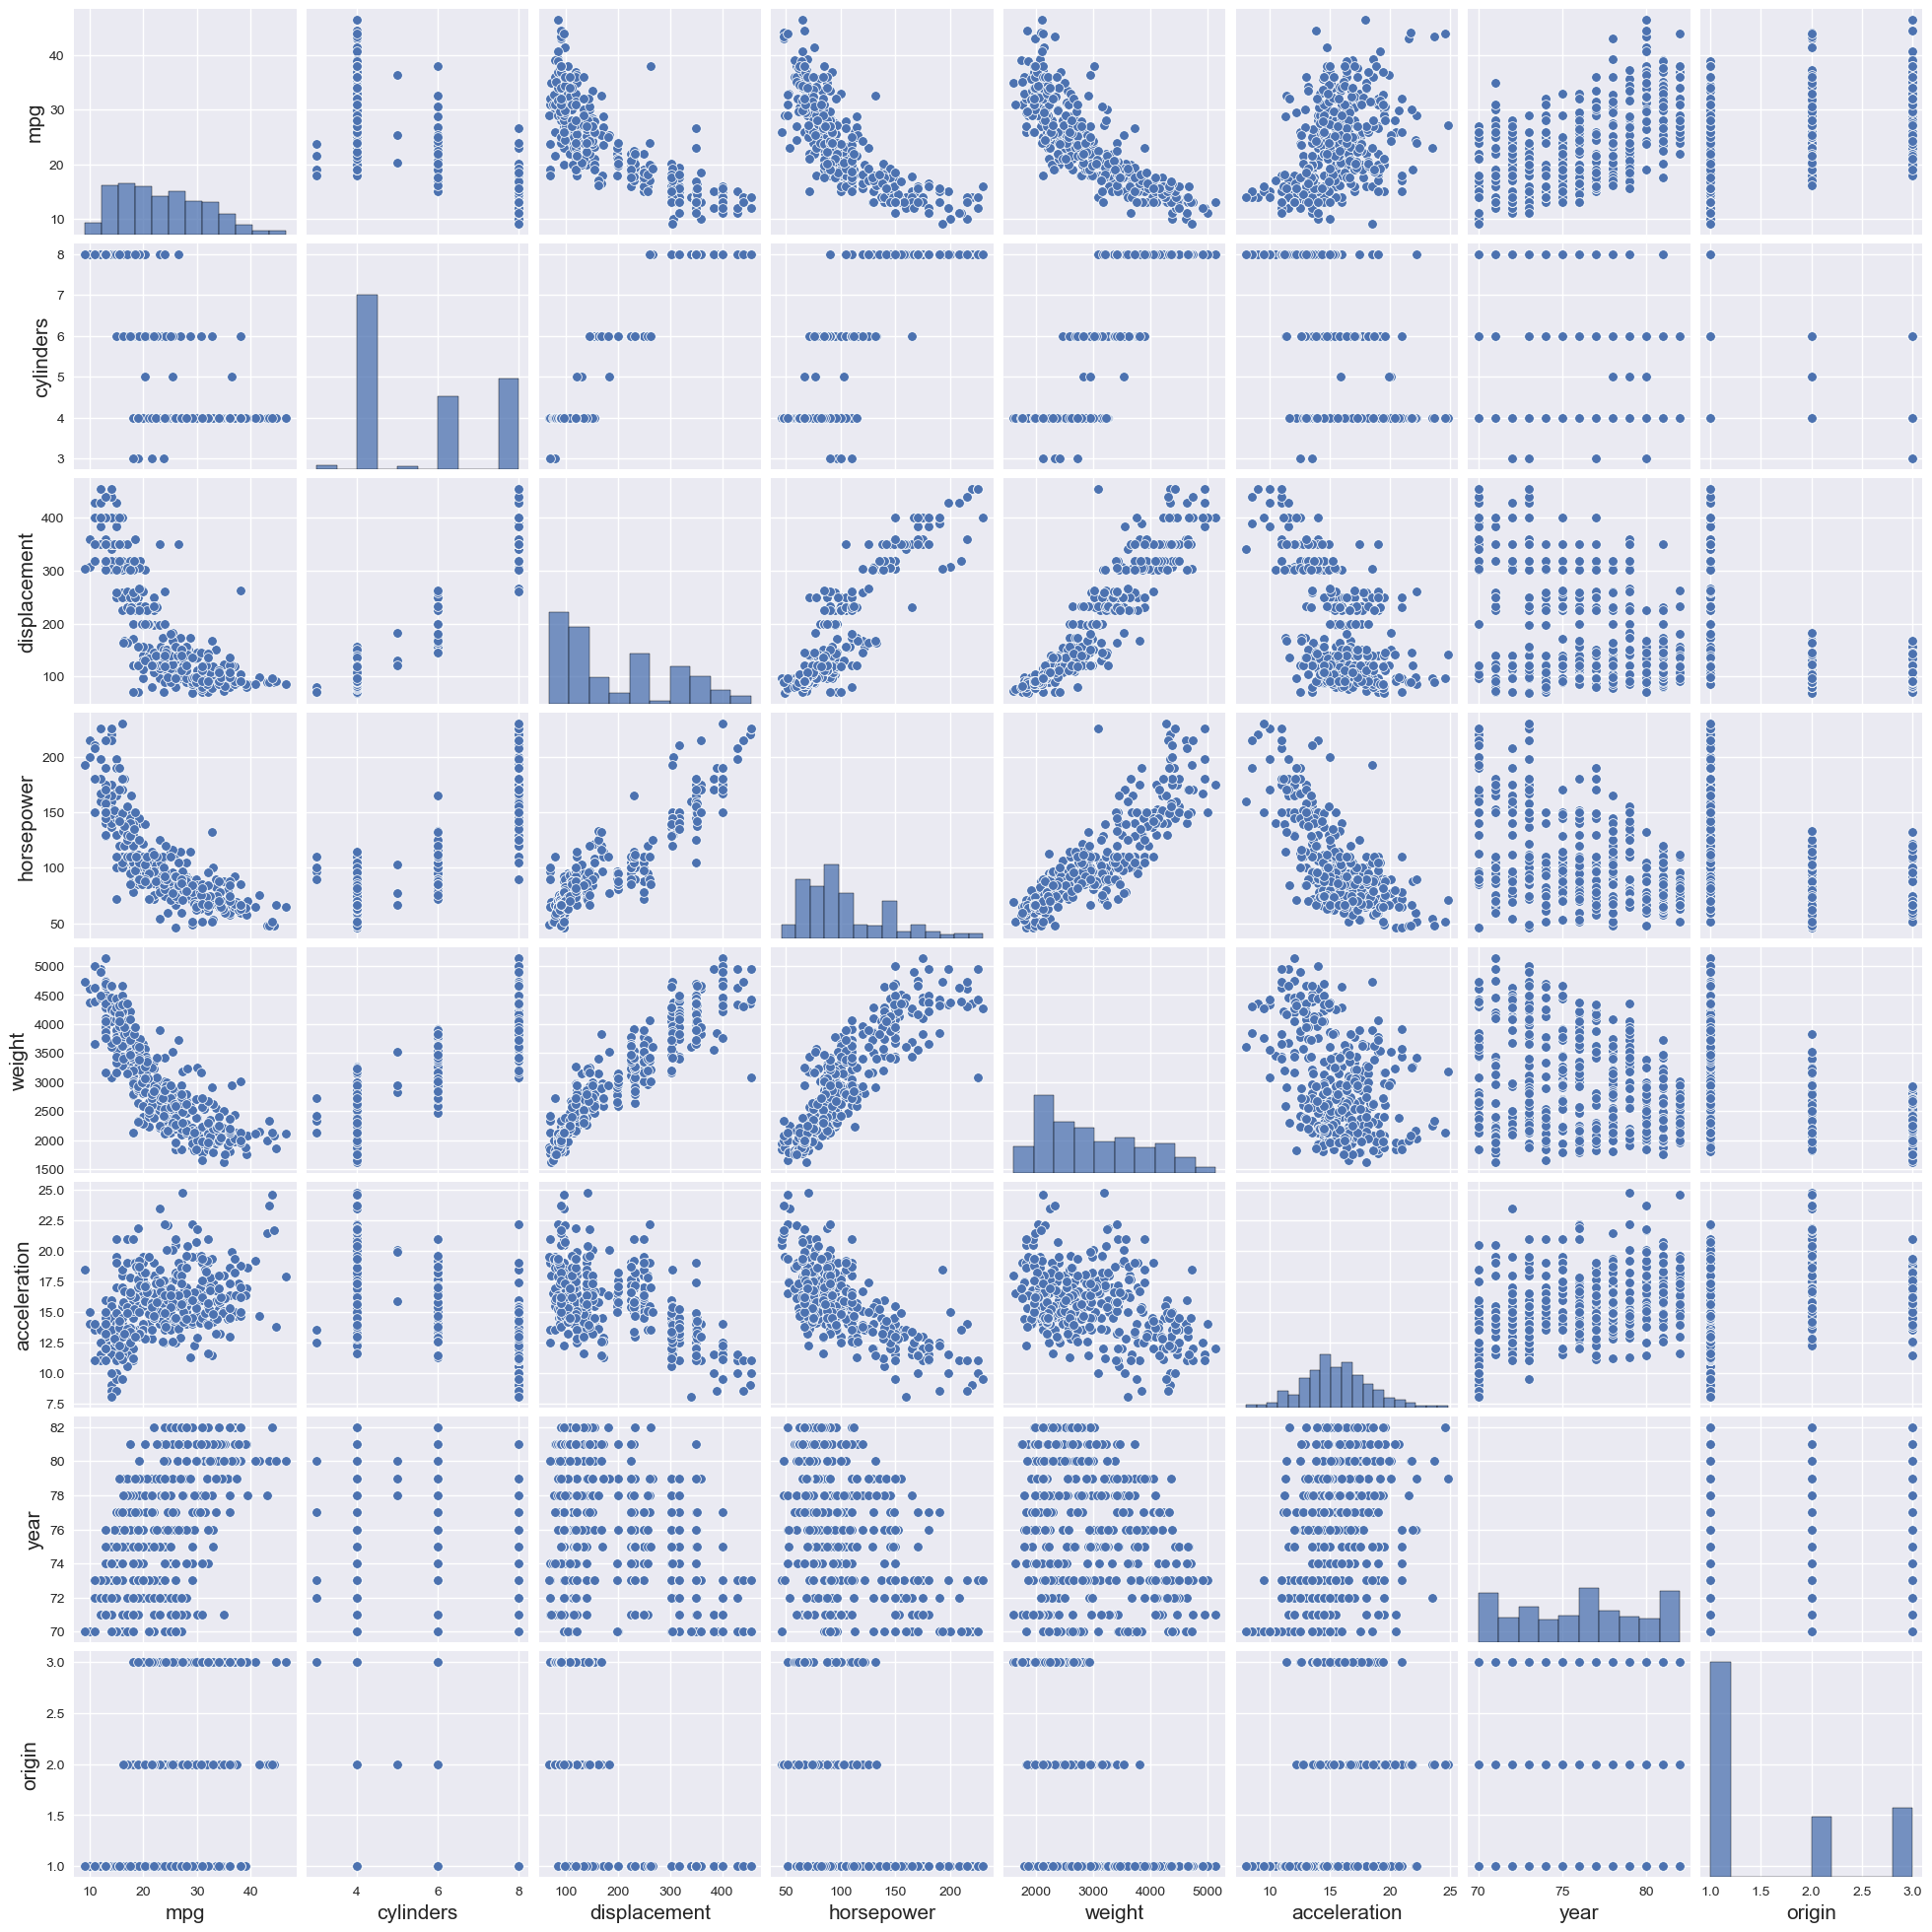

In [136]:
sns.pairplot(Auto);

- (b) Compute the matrix of correlations between the variables using the DataFrame.corr() method.

In [137]:
Auto.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


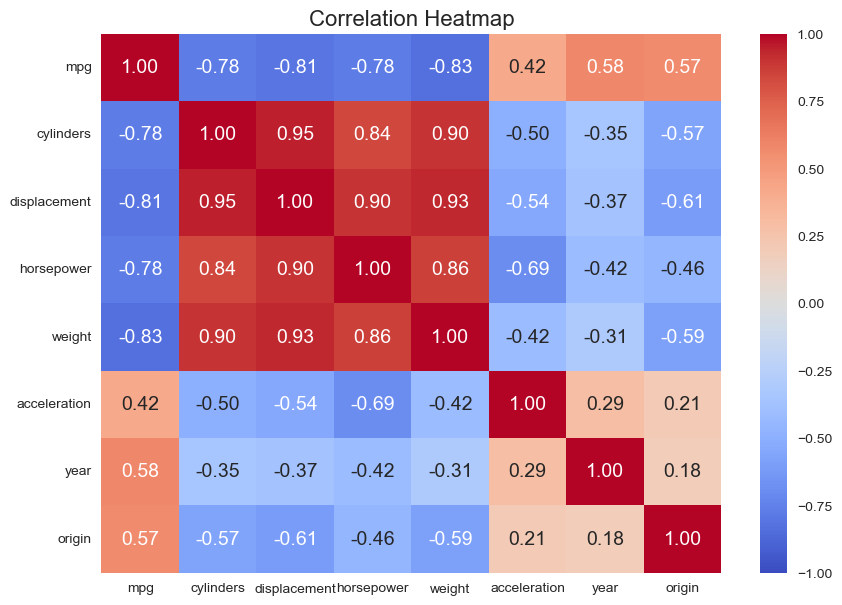

In [138]:
corr = Auto.corr(numeric_only=True)

# Now, plot the heatmap with annotations
plt.figure(figsize=(10, 7))  # Set the figure size
corr_matrix = corr.round(2)  # Compute the rounded correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f', vmin=-1, vmax=1)

plt.title('Correlation Heatmap', fontsize=16)  # Set the title of the heatmap
plt.show()  # Display the heatmap

- (c) Use the sm.OLS() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summarize() function to print the results. Comment on the output.

In [139]:
a_vars = list(Auto.columns.drop(['mpg', 'name']))
y= Auto['mpg']
X = MS(a_vars).fit_transform(Auto)
a_model = sm.OLS(y, X)
a_results = a_model.fit()
summarize(a_results)

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


In [140]:
a_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 14 Jan 2024   Prob (F-statistic):          2.04e-139
Time:                        16:07:45   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

    - i. Is there a relationship between the predictors and the response? Use the anova_lm() function from statsmodels to answer this question.

Based on the above summary output, we can see that the model has an adjusted R-squared of 0.818. This is means that the predictors explain about 82% of the variance in the response variable (mpg). We also see that the F-statistic is 252, which is well above 1. The p-value for the F-stat is also basically 0. These indicate that the predictor variables have a strong relationship with the response.

In [141]:
# Using anova_lm to compare the first model against the second model
anova_lm(results_hp_mpg, a_results)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,390.0,9385.915872,0.0,NaN,NaN,NaN
1,384.0,4252.212530,6.0,5133.703341,77.267308,5.376746e-63


- The F value is very high (77.267308), and the corresponding p-value is extremely small (5.37646e-63, which is essentially zero). This suggests that there is a very strong relationship between the predictors and the response variable.

- The df_resid and ssr values in the first row represent the baseline model with no predictors (only an intercept). Since df_diff and ss_diff are not applicable for a single model without comparison, they are marked as NaN.

- The second row compares the full model against this baseline model. The degrees of freedom for the residuals (df_resid) have decreased from the baseline model to the full model, showing that the full model has additional parameters.

- The very small p-value indicates that the model with predictors (the full model) provides a significantly better fit to the data than the baseline model, which means that the predictors do indeed have a significant relationship with the response variable.

    - ii. Which predictors appear to have a statistically significant relationship to the response?

Displacement, weight, year, and origin all have p-values that are statistically significant at the 0.01 level. 

    - iii. What does the coefficient for the year variable suggest?

The year variable has a positive coefficient of 0.75. It is also a significant predictor in the model, and newer cars (as indicated by a later year) are associated with an increase in the response variable, mpg. This means that, holding all other variables constant, the average mpg of cars improves over time.

- (d) Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

In [142]:
from statsmodels.graphics.gofplots import ProbPlot

plt.style.use('seaborn-v0_8') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)


# fitted values (need a constant term for intercept)
model_fitted_y = a_results.fittedvalues

# model residuals
model_residuals = a_results.resid

# normalized residuals
model_norm_residuals = a_results.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = a_results.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = a_results.get_influence().cooks_distance[0]

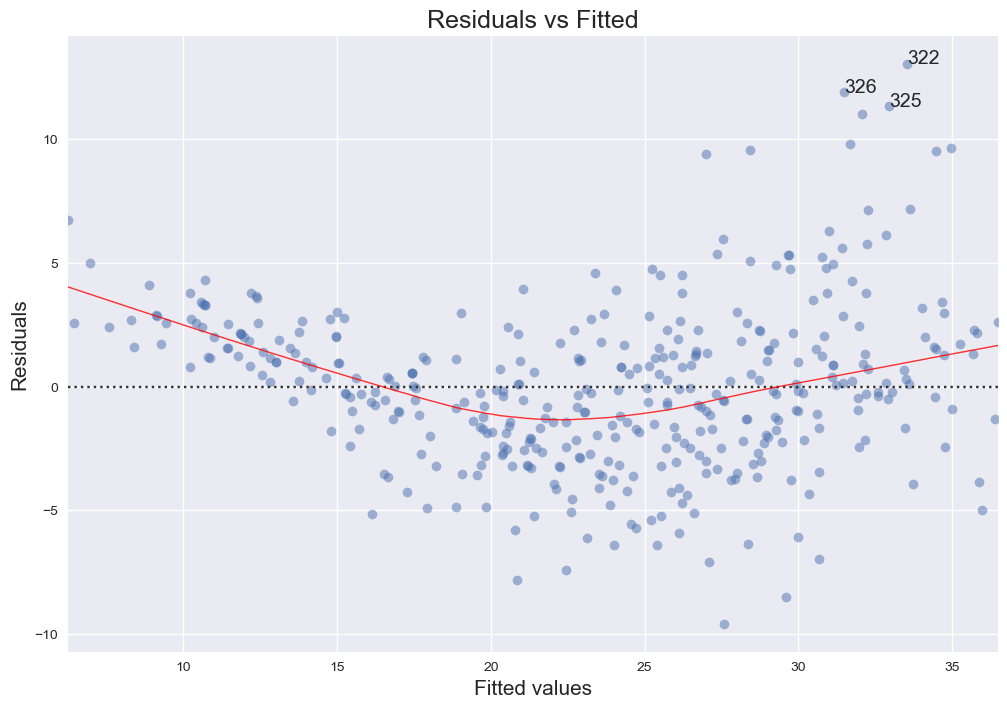

In [143]:
# Residuals against fitted values:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(x=model_fitted_y, y='mpg', data=Auto,
                                  lowess=True,
                                  scatter_kws={'alpha': 0.5},
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')


# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

- Trend in Residuals: The red curve in the plot indicates the trend in the residuals. Ideally, this should be a flat line if the model's predictions are unbiased. The curve in this plot suggests that the residuals have a non-linear relationship with the fitted values. Specifically, the residuals are lower for mid-range fitted values and higher for lower and upper-range fitted values, indicating potential heteroscedasticity (non-constant variance) or that the model may not be capturing all the relevant relationships (possible model misspecification).

- Spread of Residuals: Ideally, the spread of residuals should be constant across all levels of fitted values. In this plot, the spread seems to increase slightly as the fitted values increase, which could indicate heteroscedasticity.

- Outliers: The points labeled in the plot are typically those that stand out from the rest of the data. These could be outliers or influential points that have a significant impact on the model. The presence of outliers might suggest that the model does not account for all variations in the data or that there may be errors in data collection.

- Model Fit: Since the residuals do not scatter randomly around the zero line and there's a clear pattern, this suggests that the model may not be the best fit for the data. It could be that a non-linear model would better capture the relationship between the predictors and the response variable.

/Users/nfaupel/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


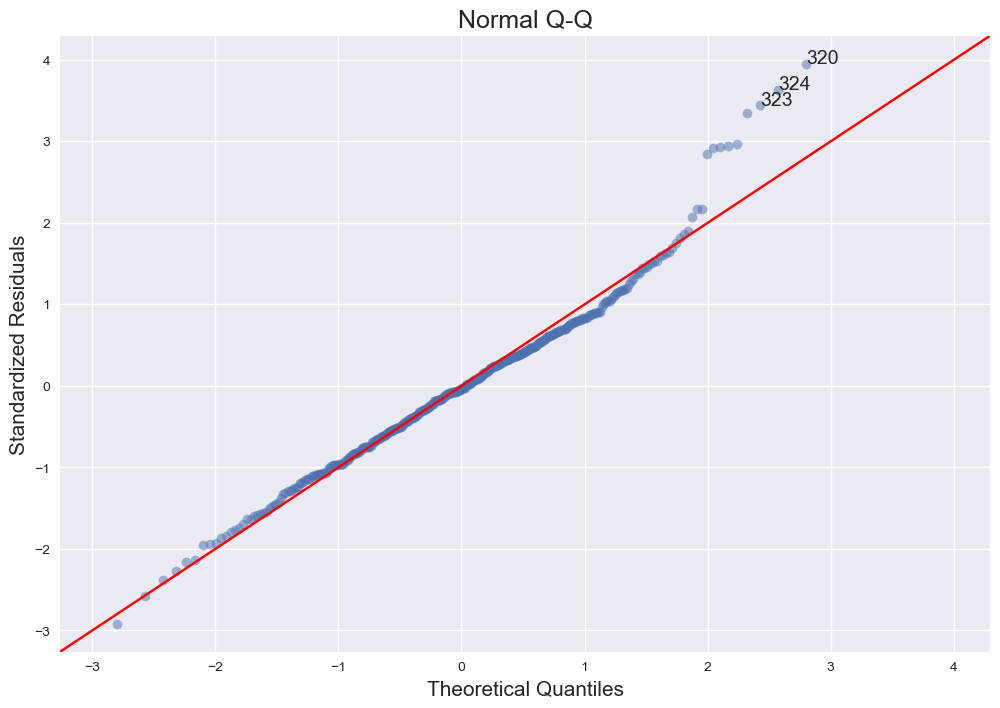

In [144]:
# Normal Q-Q plot:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

- Theoretical Quantiles: The x-axis shows the theoretical quantiles of the Normal distribution. These are the places values would lie if the data were normally distributed.

- Standardized Residuals: The y-axis shows the standardized residuals from your regression model. These are the observed data points, transformed to show deviations from the expected Normal distribution in terms of standard deviations.

- Reference Line: The red line represents where the points would lie if the data were perfectly normally distributed. The points should form a straight line along this reference line if the residuals are normally distributed.

- Deviations from Line: The degree to which the points deviate from the red line indicates how much the distribution of the residuals deviates from normality.

**Looking at this Q-Q plot:**

- The points largely follow the red reference line, particularly in the middle of the distribution, which is a good sign of normality for the central part of the data.

- There are some deviations from the line at the ends, particularly at the upper end (right side), suggesting that the residuals have heavier tails than a normal distribution (positive skewness). This could mean that extreme values are more likely than what would be expected with a normal distribution.

- The points labeled on the plot, such as 320, 323, and 324, indicate data points that are particularly far from where they would be expected to lie in a normal distribution. These could be potential outliers or influential observations that could be affecting the overall model fit.

- In summary, this Q-Q plot suggests that while the residuals of the model are close to normal in the center of the distribution, there are some deviations from normality, especially in the tails. This might affect certain assumptions of the linear regression model if these deviations are significant. Depending on the severity of the deviations and the purpose of the analysis, you may consider transformations of the response variable, robust regression techniques, or other methods to address the non-normality.

In [145]:
# Taking a look at the outliers in the data
Auto.iloc[[320, 323, 324]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
322,46.6,4,86.0,65.0,2110.0,17.9,80,3,mazda glc
325,44.3,4,90.0,48.0,2085.0,21.7,80,2,vw rabbit c (diesel)
326,43.4,4,90.0,48.0,2335.0,23.7,80,2,vw dasher (diesel)


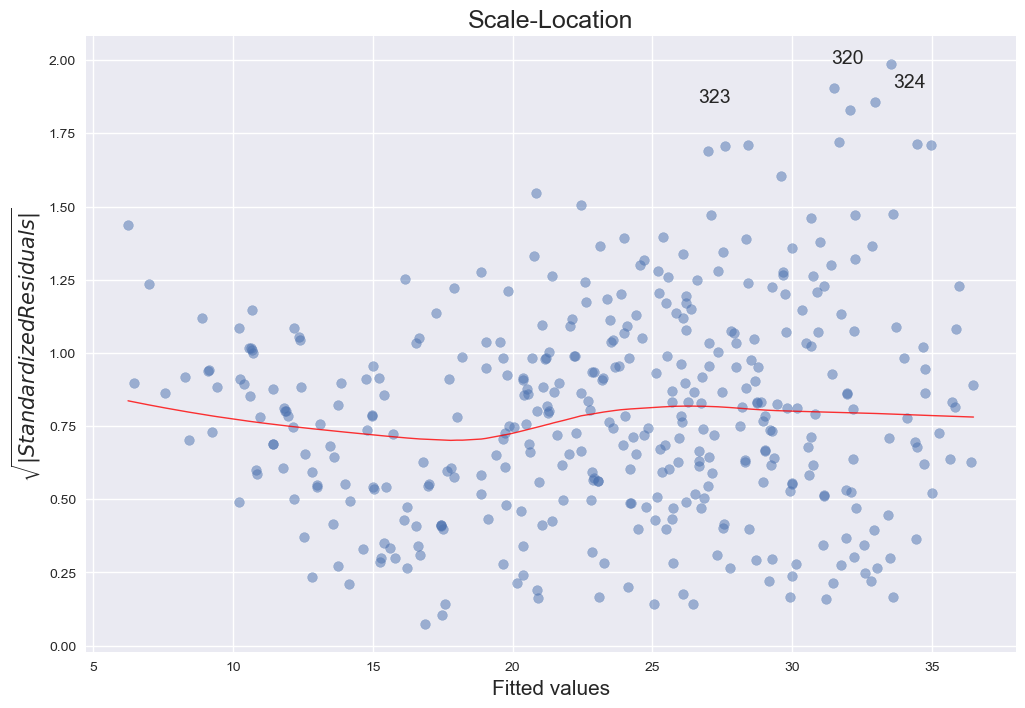

In [146]:
# Scale-Location plot of sqrt(|residuals|) against fitted values:

plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(x=model_fitted_y, y=model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');


for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]));

The plot provided is a **Scale-Location plot**, also known as a **Spread-Location plot**. It is utilized to verify the assumption of homoscedasticity, which is the constant variance of residuals in a regression model.

- **Fitted Values**: The x-axis signifies the model's fitted values — the model's predictions.
- **Standardized Residuals**: The y-axis displays the square root of the standardized residuals, facilitating better visibility of the variances.
- **Trend Line**: The red line, often rendered using lowess smoothing, aids in visualizing the residual spread trend. Ideally, for homoscedasticity, this line should be flat.
- **Interpretation**: The plot assesses if residuals spread equally across fitted values. A non-horizontal trend line suggests that the variance of residuals is non-constant, violating homoscedasticity.


**Insights from the Plot:**

- The red trend line exhibits some waviness but does not show a clear trend of increasing or decreasing variance across the fitted values.
- The residuals' spread seems consistent, suggesting the assumption of homoscedasticity is reasonably met.
- Labeled points like 320, 323, and 324 are potentially influential outliers, standing apart from the cluster of data.


**Conclusion:**

The plot indicates no strong violation of the homoscedasticity assumption, which is positive for the regression model's validity. However, the identified outliers warrant further examination for their potential impact on the model.

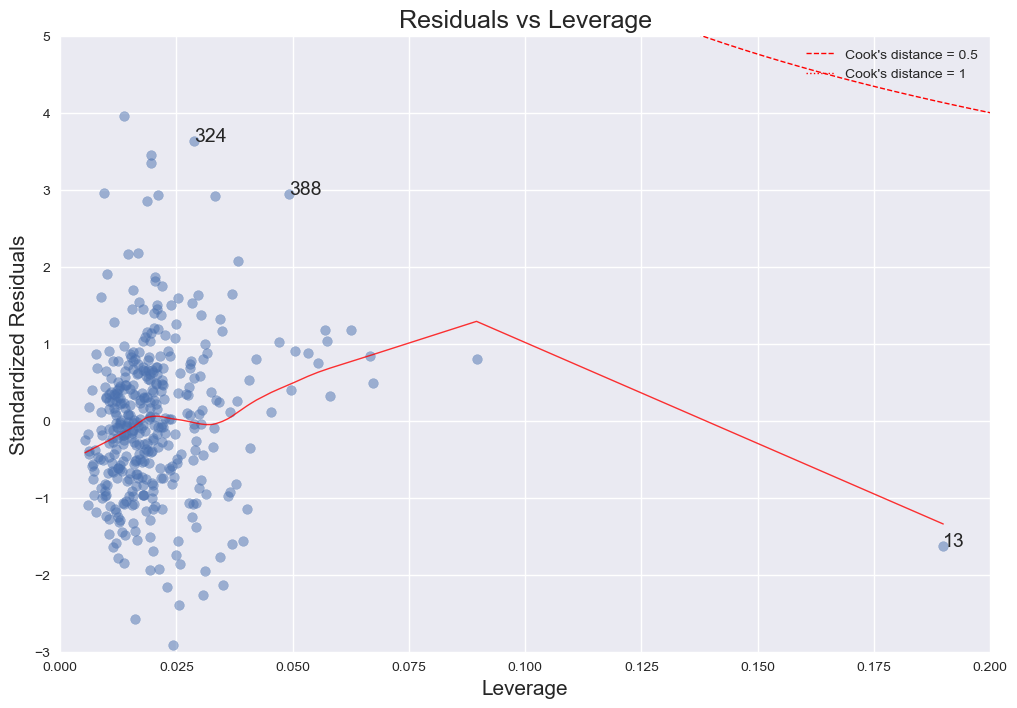

In [147]:
# Residuals against leverages:

plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(x=model_leverage, y=model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None, ls='-'):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls=ls, color='red')

p = len(a_results.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance = 0.5', ls='--') # 0.5 line

graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 'Cook\'s distance = 1', ls=':') # 1 line

plt.legend(loc='upper right');


#### Residuals vs. Leverage Plot Analysis

The graph is a **Residuals vs. Leverage** plot, which is instrumental in identifying influential data points in a regression model.

#### Interpretation:

- **Leverage (x-axis):** Represents the influence of each data point's values on the model's predictions. High leverage points can have a disproportionate impact on the model's coefficients.

- **Standardized Residuals (y-axis):** Depict the difference between observed and predicted values. Data points with large residuals do not fit the model well.

- **Cook's Distance (dashed lines):** Used to quantify the influence of each observation. Points outside the Cook's distance lines might be considered influential.

#### Key Observations:

- Points like **13**, **324**, and **388** are highlighted due to their distance from the majority, indicating they may be outliers or have a high influence on the model.

- The **red curve** helps visualize the relationship between leverage and residuals. Ideally, there should be no pattern, suggesting no particular relationship.

#### Conclusions:

- The presence of points with high leverage and large residuals could indicate potential issues with the data or the model, such as outliers or leverage points.

- Such points warrant further investigation, as they may affect the validity of the regression model and its predictions.


- (e) Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?

In [148]:
# New model with interaction between acceleration and horsepower
b1_vars = list(Auto.columns.drop(['mpg', 'name']))
b1_vars = b1_vars + [('acceleration', 'horsepower')]
y = Auto['mpg']
X = MS(b1_vars).fit_transform(Auto)
b1_model = sm.OLS(y, X)
b1_results = b1_model.fit()
b1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     253.2
Date:                Sun, 14 Jan 2024   Prob (F-statistic):          8.74e-148
Time:                        16:07:46   Log-Likelihood:                -1000.8
No. Observations:                 392   AIC:                             2020.
Df Residuals:                     383   BIC:                             2055.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
intercept                 -32.4998      4.923     -6.601      0.000     -42.180     -22.820
cylinders                   0.0835      0.317      0.263      0.792      -0.540       0.707
displacement               -0.0076      0.008     -0.937      0.349      -0.024       0.008
horsepower                  0.1272      0.025      5.140      0.000       0.079       0.176
weight                     -0.0040      0.001     -5.552      0.000      -0.005      -0.003
acceleration                0.9833      0.162      6.088      0.000       0.666       1.301
year                        0.7559      0.048     15.690      0.000       0.661       0.851
origin                      1.0357      0.269      3.851      0.000       0.507       1.565
acceleration:horsepower    -0.0121      0.002     -6.851      0.000      -0.016      -0.009
==============================================================================
Omnibus:                       21.612   Durbin-Watson:                   1.469
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.894
Skew:                           0.382   Prob(JB):                     2.65e-08
Kurtosis:                       4.246   Cond. No.                     1.08e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [149]:
# New model with interaction between acceleration and horsepower
b2_vars = list(Auto.columns.drop(['mpg', 'name']))
b2_vars = b2_vars + [('acceleration', 'horsepower'), ('cylinders', 'displacement')]
y = Auto['mpg']
X = MS(b2_vars).fit_transform(Auto)
b2_model = sm.OLS(y, X)
b2_results = b2_model.fit()
b2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     247.4
Date:                Sun, 14 Jan 2024   Prob (F-statistic):          2.22e-153
Time:                        16:07:46   Log-Likelihood:                -984.67
No. Observations:                 392   AIC:                             1989.
Df Residuals:                     382   BIC:                             2029.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
intercept                 -16.0058      5.538     -2.890      0.004     -26.896      -5.116
cylinders                  -1.8164      0.450     -4.034      0.000      -2.702      -0.931
displacement               -0.0732      0.014     -5.277      0.000      -0.101      -0.046
horsepower                  0.0536      0.027      1.982      0.048       0.000       0.107
weight                     -0.0039      0.001     -5.645      0.000      -0.005      -0.003
acceleration                0.6543      0.165      3.954      0.000       0.329       0.980
year                        0.7608      0.046     16.432      0.000       0.670       0.852
origin                      0.6175      0.269      2.299      0.022       0.089       1.146
acceleration:horsepower    -0.0079      0.002     -4.277      0.000      -0.012      -0.004
cylinders:displacement      0.0105      0.002      5.727      0.000       0.007       0.014
==============================================================================
Omnibus:                       27.241   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.553
Skew:                           0.333   Prob(JB):                     9.60e-15
Kurtosis:                       4.873   Cond. No.                     1.37e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [150]:
# New model with interaction between acceleration and horsepower
b3_vars = list(Auto.columns.drop(['mpg', 'name']))
b3_vars = b3_vars + [('acceleration', 'horsepower'), ('cylinders', 'displacement'), ('cylinders', 'weight'), ('horsepower', 'weight'), ('acceleration', 'displacement')]
y = Auto['mpg']
X = MS(b3_vars).fit_transform(Auto)
b3_model = sm.OLS(y, X)
b3_results = b3_model.fit()
b3_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     206.4
Date:                Sun, 14 Jan 2024   Prob (F-statistic):          6.92e-158
Time:                        16:07:46   Log-Likelihood:                -965.39
No. Observations:                 392   AIC:                             1957.
Df Residuals:                     379   BIC:                             2008.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
intercept                    -6.2974      5.611     -1.122      0.262     -17.330       4.735
cylinders                    -1.8305      1.198     -1.527      0.127      -4.187       0.526
displacement                  0.0166      0.037      0.453      0.651      -0.055       0.089
horsepower                   -0.0596      0.074     -0.808      0.419      -0.205       0.085
weight                       -0.0118      0.002     -4.979      0.000      -0.016      -0.007
acceleration                  0.5620      0.213      2.636      0.009       0.143       0.981
year                          0.7798      0.045     17.348      0.000       0.691       0.868
origin                        0.6641      0.258      2.578      0.010       0.158       1.171
acceleration:horsepower      -0.0064      0.003     -1.925      0.055      -0.013       0.000
cylinders:displacement       -0.0020      0.004     -0.528      0.598      -0.010       0.005
cylinders:weight              0.0008      0.001      1.452      0.147      -0.000       0.002
horsepower:weight          2.868e-05   1.18e-05      2.425      0.016    5.43e-06    5.19e-05
acceleration:displacement    -0.0006      0.001     -0.445      0.656      -0.003       0.002
==============================================================================
Omnibus:                       33.373   Durbin-Watson:                   1.542
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.145
Skew:                           0.495   Prob(JB):                     7.15e-15
Kurtosis:                       4.735   Cond. No.                     1.56e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Based on the above models, there are plenty of interactions that appear to be statistically significant. I only tried 5, but all 5 were statistically significant at the 0.05 level. This is likely due to how strongly correlated these variables are with one another.**

- (f) Try a few different transformations of the variables, such as log(X), √X, X2. Comment on your findings.

In [151]:
Auto_copy = Auto.copy()

Auto_copy['log_horsepower'] = np.log(Auto_copy['horsepower'])
Auto_copy['square_displacement'] = Auto_copy['displacement'] ** 2
c_vars = list(Auto_copy.columns.drop(['mpg', 'name']))
y = Auto['mpg']
X = MS(c_vars).fit_transform(Auto_copy)
c_model = sm.OLS(y, X)
c_results = c_model.fit()
c_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     269.1
Date:                Sun, 14 Jan 2024   Prob (F-statistic):          2.36e-159
Time:                        16:07:46   Log-Likelihood:                -970.51
No. Observations:                 392   AIC:                             1961.
Df Residuals:                     382   BIC:                             2001.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept              56.6392     13.768      4.114      0.000      29.569      83.710
cylinders               0.4124      0.315      1.310      0.191      -0.207       1.031
displacement           -0.0597      0.017     -3.528      0.000      -0.093      -0.026
horsepower              0.0923      0.032      2.844      0.005       0.028       0.156
weight                 -0.0032      0.001     -5.003      0.000      -0.005      -0.002
acceleration           -0.2477      0.098     -2.532      0.012      -0.440      -0.055
year                    0.7507      0.045     16.787      0.000       0.663       0.839
origin                  0.5499      0.267      2.057      0.040       0.024       1.075
log_horsepower        -18.1022      3.579     -5.058      0.000     -25.139     -11.065
square_displacement     0.0001   2.95e-05      3.577      0.000    4.75e-05       0.000
==============================================================================
Omnibus:                       28.787   Durbin-Watson:                   1.571
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.341
Skew:                           0.415   Prob(JB):                     2.14e-13
Kurtosis:                       4.698   Cond. No.                     6.67e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [152]:
# Write functions for residual plots:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot


# Function for plot style
def setup_plotting_style():
    plt.style.use('seaborn-v0_8')
    plt.rc('font', size=14)
    plt.rc('figure', titlesize=18)
    plt.rc('axes', labelsize=15, titlesize=18)


# Function for plotting residuals vs fitted
def plot_residuals_vs_fitted(a_results, data, response_variable):
    setup_plotting_style()
    model_fitted_y = a_results.fittedvalues
    model_residuals = a_results.resid
    model_abs_resid = np.abs(model_residuals)
    abs_resid_top_3 = model_abs_resid.sort_values(ascending=False)[:3]

    fig, ax = plt.subplots(figsize=(12, 8))
    sns.residplot(x=model_fitted_y, y=response_variable, data=data,
                  lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=ax)
    ax.set_title('Residuals vs Fitted')
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')

    for i in abs_resid_top_3.index:
        ax.annotate(i, xy=(model_fitted_y[i], model_residuals[i]))


# Functions for plotting QQ plot
def plot_qq(a_results):
    setup_plotting_style()
    model_norm_residuals = a_results.get_influence().resid_studentized_internal
    QQ = ProbPlot(model_norm_residuals)
    fig = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
    fig.set_figheight(8)
    fig.set_figwidth(12)

    ax = fig.axes[0]
    ax.set_title('Normal Q-Q')
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Standardized Residuals')

    abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
    abs_norm_resid_top_3 = abs_norm_resid[:3]
    for r, i in enumerate(abs_norm_resid_top_3):
        ax.annotate(i, xy=(np.flip(QQ.theoretical_quantiles, 0)[r], model_norm_residuals[i]))


# Function for plotting scale location plot
def plot_scale_location(a_results):
    setup_plotting_style()
    model_fitted_y = a_results.fittedvalues
    model_norm_residuals = a_results.get_influence().resid_studentized_internal
    model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
    abs_norm_resid_top_3 = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)[:3]

    fig, ax = plt.subplots(figsize=(12, 8))
    plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
    sns.regplot(x=model_fitted_y, y=model_norm_residuals_abs_sqrt, 
                scatter=False, ci=False, lowess=True, 
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=ax)
    ax.set_title('Scale-Location')
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('$\sqrt{|Standardized Residuals|}$')

    for i in abs_norm_resid_top_3:
        ax.annotate(i, xy=(model_fitted_y[i], model_norm_residuals_abs_sqrt[i]))


# Function for plotting residuals vs leverage
def plot_residuals_vs_leverage(a_results):
    setup_plotting_style()
    model_leverage = a_results.get_influence().hat_matrix_diag
    model_norm_residuals = a_results.get_influence().resid_studentized_internal
    model_cooks = a_results.get_influence().cooks_distance[0]
    leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
    p = len(a_results.params)

    fig, ax = plt.subplots(figsize=(12, 8))
    plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
    sns.regplot(x=model_leverage, y=model_norm_residuals, 
                scatter=False, ci=False, lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=ax)

    ax.set_xlim(0, 0.20)
    ax.set_ylim(-3, 5)
    ax.set_title('Residuals vs Leverage')
    ax.set_xlabel('Leverage')
    ax.set_ylabel('Standardized Residuals')

    for i in leverage_top_3:
        ax.annotate(i, xy=(model_leverage[i], model_norm_residuals[i]))

    def graph(formula, x_range, label=None, ls='-'):
        x = x_range
        y = formula(x)
        plt.plot(x, y, label=label, lw=1, ls=ls, color='red')

    graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
          np.linspace(0.001, 0.200, 50), 
          'Cook\'s distance = 0.5', ls='--')

    graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
          np.linspace(0.001, 0.200, 50), 'Cook\'s distance = 1', ls=':')

    plt.legend(loc='upper right')


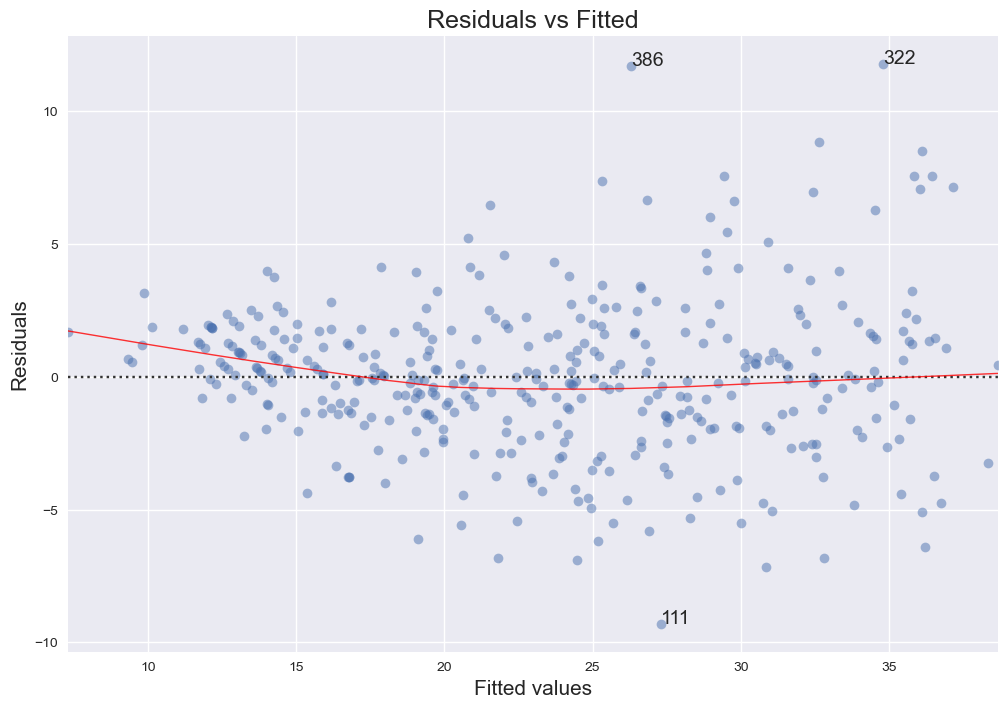

In [153]:
# Residuals against fitted values:
plot_residuals_vs_fitted(c_results, Auto_copy, y)

/Users/nfaupel/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


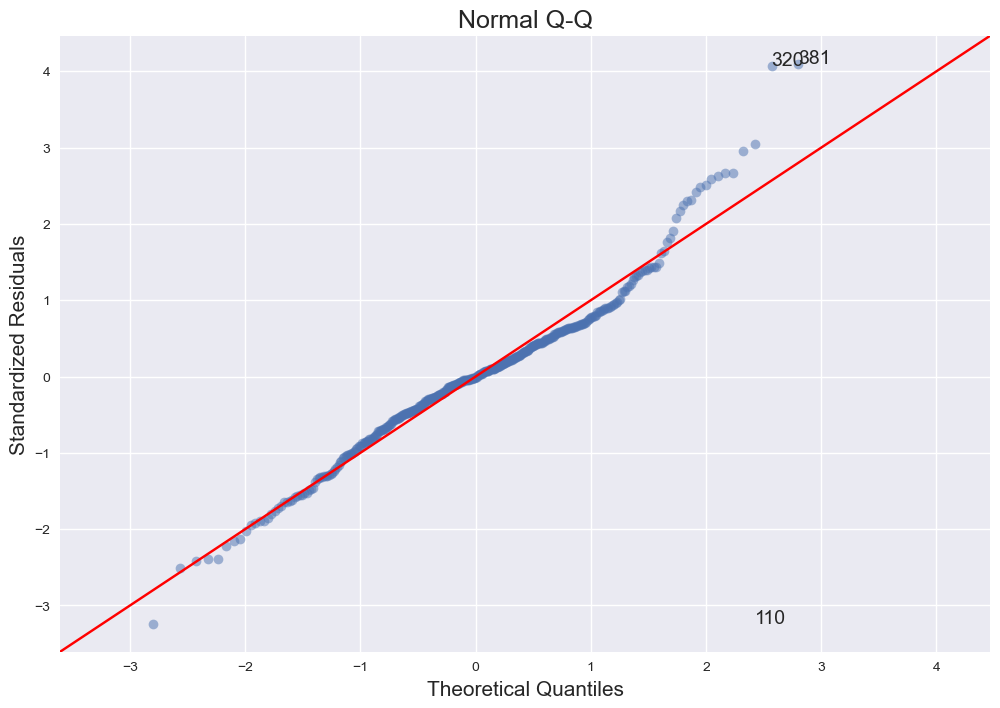

In [154]:
# Normal Q-Q plot:
plot_qq(c_results)

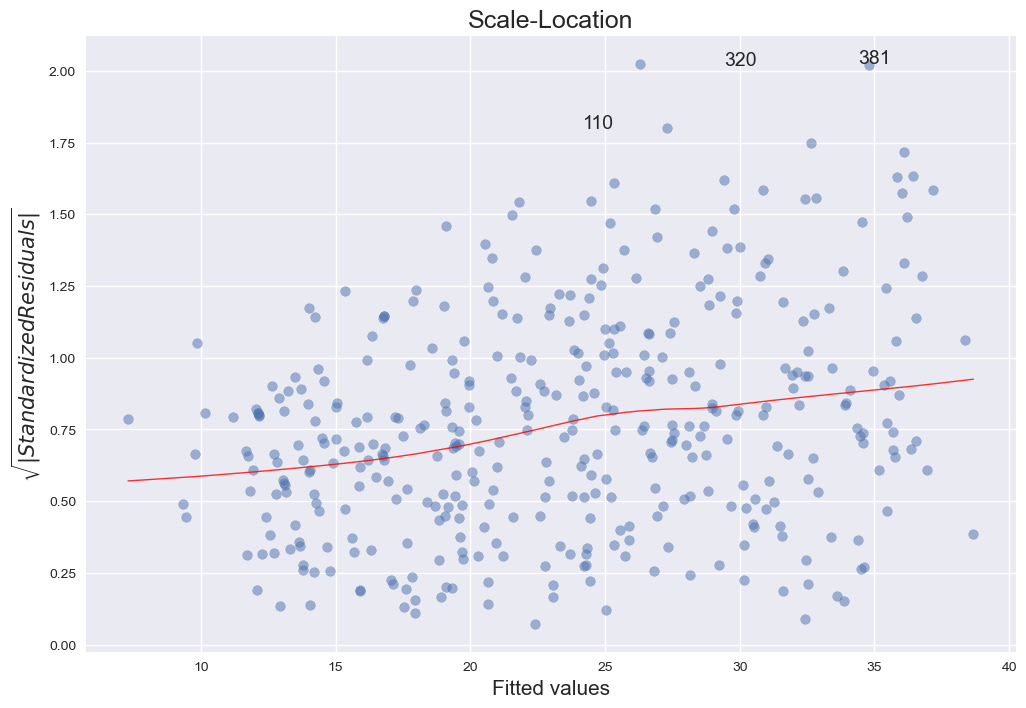

In [155]:
# Scale-Location plot of sqrt(|residuals|) against fitted values:
plot_scale_location(c_results)

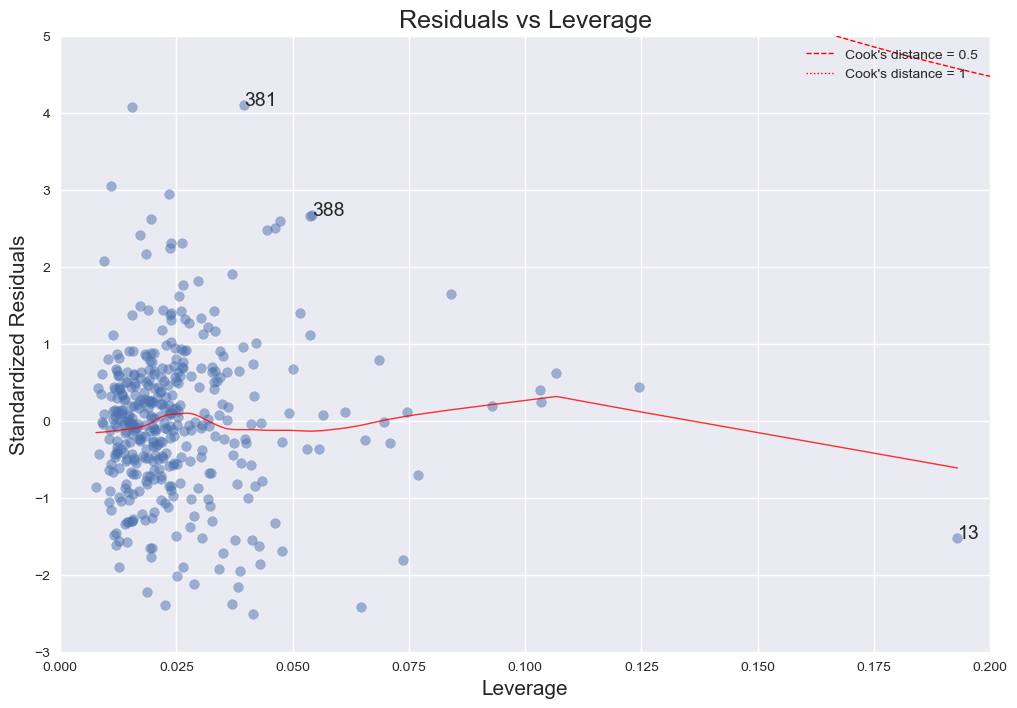

In [156]:
# Residuals against leverages:
plot_residuals_vs_leverage(c_results)

**We can see that by adding the logarithm of horsepower and squaring displacement, the model has a much better fit compared to the original model. This is evident in the p-values of the predictors, the adjusted R-squared, and the residual plot. The adjust R-squared for this model is actually only slightly worse than the model with all of the interactions. Though it does appear that there may be some heteroscedasticity now.**

### #10. This question should be answered using the Carseats data set.

In [157]:
Carseats = pd.read_csv('~/Desktop/Learning/ISL-P/ISLP_DataFiles/Carseats.csv')

Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [158]:
Carseats.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [159]:
# Change categorical variable dtypes
for i in Carseats.columns:
    if Carseats[i].dtype == 'object':
        Carseats[i] = Carseats[i].astype('category')

Carseats.dtypes

Sales           float64
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc      category
Age               int64
Education         int64
Urban          category
US             category
dtype: object

- (a) Fit a multiple regression model to predict Sales using Price, Urban, and US.

In [160]:
# Regression model
d_vars = ['Price', 'Urban', 'US']
y = Carseats['Sales']
X = MS(d_vars).fit_transform(Carseats)
d_model = sm.OLS(y, X)
d_results = d_model.fit()
d_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           2.39e-23
Time:                        16:07:46   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban[Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- (b) Provide an interpretation of each coefficient in the model. Be careful — some of the variables in the model are qualitative!

- Intercept (13.0435): This coefficient represents the baseline value for `Sales` when all other predictors in the model are set to zero. In practical terms, assuming `Price`, `Urban`, and `US` effects are zero, the expected value of `Sales` would be approximately 13.0435 units.

- `Price` (-0.0545): The `Price` coefficient is negative, indicating an inverse relationship between the `Price` of a product and its `Sales`. Specifically, for each unit increase in `Price`, `Sales` are expected to decrease by 0.0545 units, all else being equal. This coefficient is statistically significant, given the P-value is less than 0.05.

- `Urban[Yes]` (-0.0219): The `Urban` variable here is qualitative and has been dummy-coded, with 'Yes' indicating an urban location. The negative coefficient suggests that if a store is in an urban area, `Sales` are expected to decrease by 0.0219 units compared to stores not in an urban area, holding other factors constant. However, this effect is not statistically significant since the P-value is greater than 0.05 (0.936).

- `US[Yes]` (1.2006): Similar to `Urban`, `US` is a qualitative variable indicating whether the store is in the US. The positive coefficient for `US[Yes]` means that stores in the US are expected to have `Sales` 1.2006 units higher than stores not in the US, assuming all other variables are held constant. This coefficient is statistically significant, with a P-value less than 0.05.

- When interpreting the coefficients of qualitative variables, it's important to remember that the magnitude and significance of the coefficient relate to the difference between the category specified and the reference category (often the absence of the feature or the 'No' category in binary variables).

- The model's R-squared value is 0.239, which means that approximately 23.9% of the variability in `Sales` can be explained by the model. The adjusted R-squared is 0.234, slightly lower to account for the number of predictors in the model. Since the F-statistic is significant (P < 0.05), you can reject the null hypothesis that all the regression coefficients are equal to zero, meaning the model provides a better fit to the data than a model with no predictors.

- (c) Write out the model in equation form, being careful to handle the qualitative variables properly.

13.0435 - 0.0545 * `Price` - 0.0219 * `Urban[Yes]` + 1.2006 * `US[Yes]`

- (d) For which of the predictors can you reject the null hypothesis H0 :βj =0?

We can reject the null hypothesis stated above for the variables `Price` and `US` given their small p-values. They are both statistically significant at the 0.01 level. 

- (e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [161]:
# Regression model
e_vars = ['Price', 'US']
y = Carseats['Sales']
X = MS(e_vars).fit_transform(Carseats)
e_model = sm.OLS(y, X)
e_results = e_model.fit()
e_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           2.66e-24
Time:                        16:07:46   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US[Yes]        1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- (f) How well do the models in (a) and (e) fit the data?

- The R-squared values are identical for both models, which means that both models explain the same proportion of variance in the dependent variable, 'Sales'. However, since the Adjusted R-squared is slightly higher in the second model, it suggests a slightly better fit when considering the number of predictors.

- The F-statistic is higher for the second model, indicating a stronger relationship between the predictors and the dependent variable.

- The AIC and BIC are both lower for the second model, suggesting that the second model has a better overall fit considering the complexity of the model.

- In conclusion, based on these metrics, the second model appears to fit the data slightly better than the first model. This could be due to the simplification of the model by removing the non-significant 'Urban' variable, which did not contribute to explaining the variance in 'Sales' and only added complexity to the model.

- (g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).

95% confidence intervals are provided in the summary output. However, these can be calculated by taking coef +- 2*std.err.

- (h) Is there evidence of outliers or high leverage observations in the model from (e)?

There do not appear to be any outliers or high leverage observations that would significantly impact the model fit.

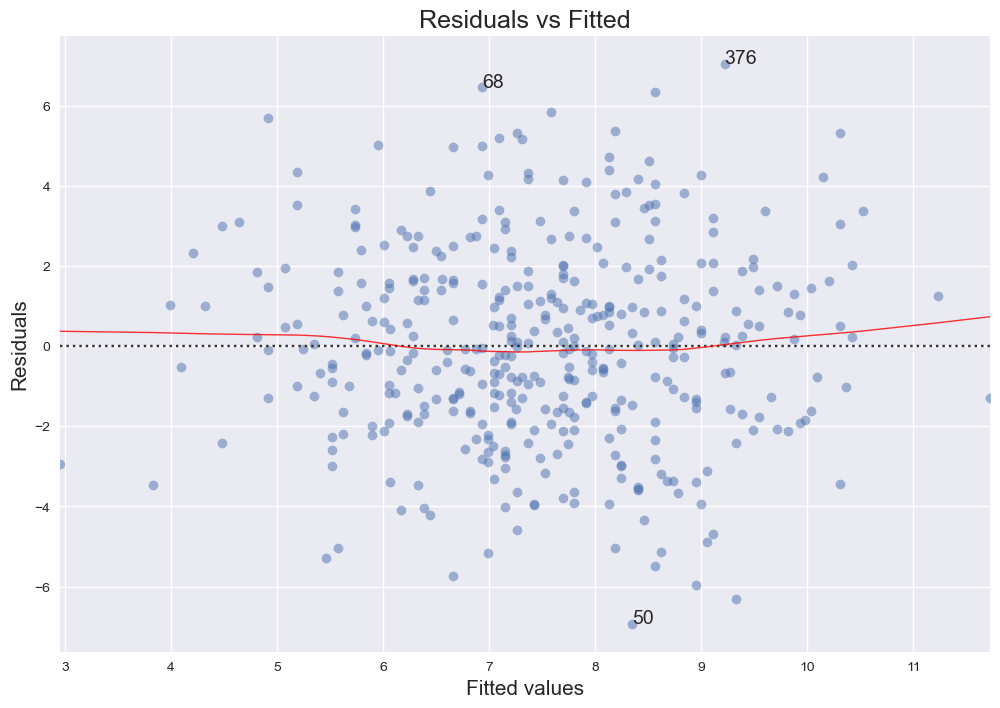

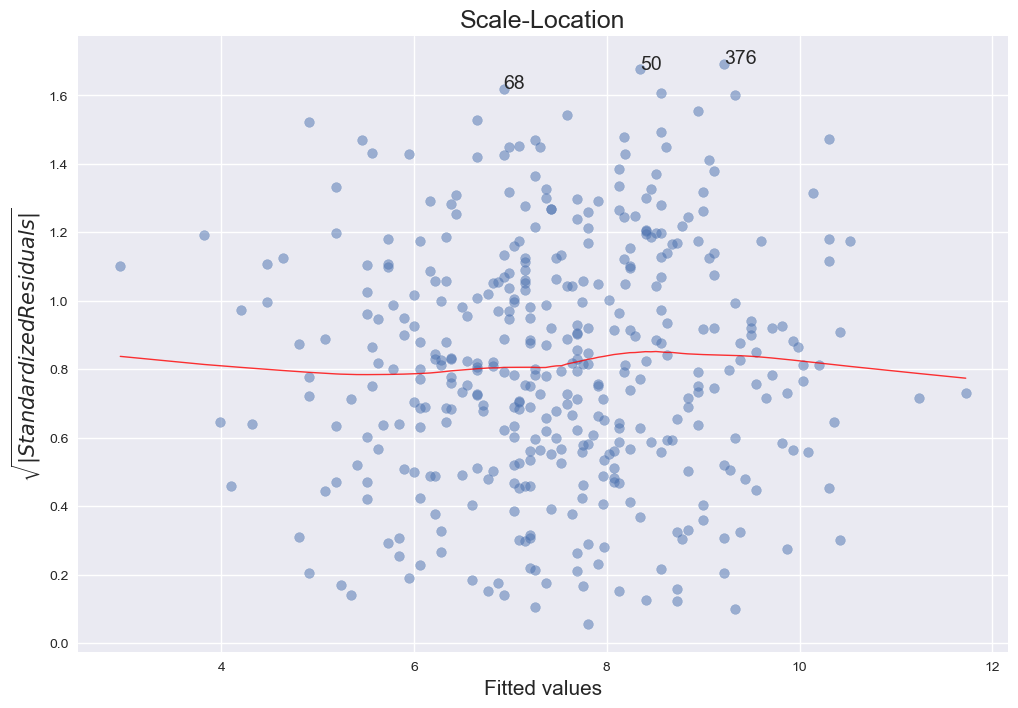

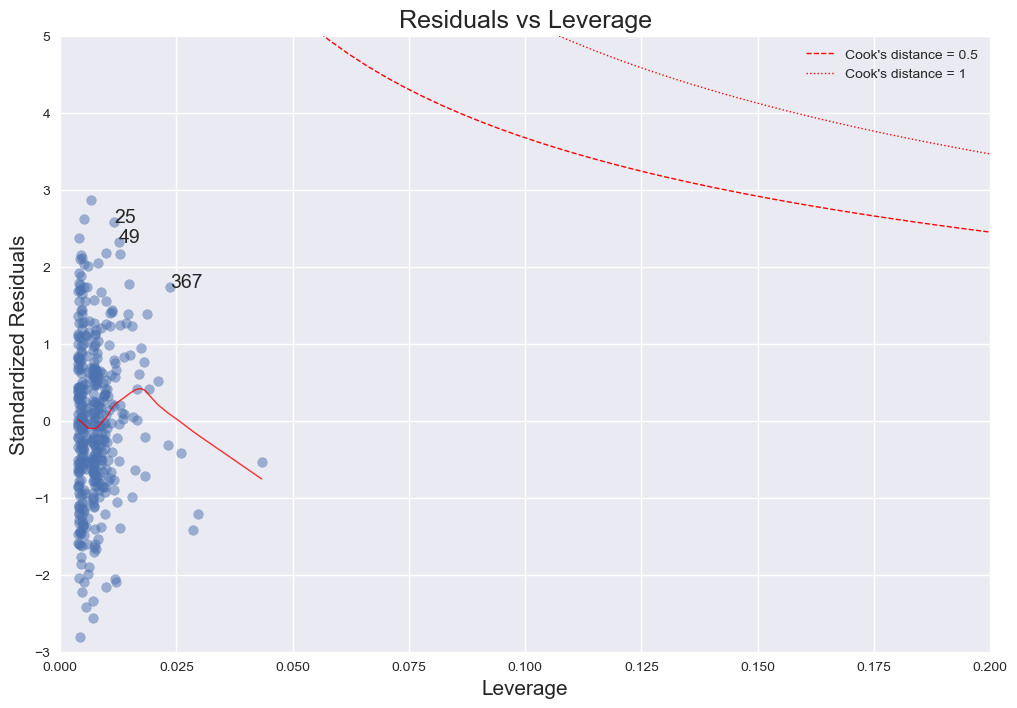

In [162]:
# Residuals against fitted values:
plot_residuals_vs_fitted(e_results, Carseats, y)

# Scale-Location plot of sqrt(|residuals|) against fitted values:
plot_scale_location(e_results)

# Residuals against leverages:
plot_residuals_vs_leverage(e_results)